In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
def least_squares_fit_polynomial(x_values, y_values, degree):
    # Convertendo listas em arrays numpy
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Criando a matriz de características
    X = np.column_stack([x_values ** i for i in range(degree + 1)])

    # Resolvendo o sistema de equações normais
    coefficients = np.linalg.lstsq(X, y_values, rcond=None)[0]

    # Calculando os valores ajustados
    y_predicted = np.dot(X, coefficients)

    # Calculando SQT (soma dos quadrados totais)
    y_mean = np.mean(y_values)
    SQT = np.sum((y_values - y_mean) ** 2)

    # Calculando SQE (soma dos quadrados dos erros)
    SQE = np.sum((y_values - y_predicted) ** 2)

    # Calculando o coeficiente de determinação (R²)
    r_squared = 1 - (SQE / SQT)

    return coefficients, y_predicted, SQT, SQE, r_squared

# Função para imprimir a equação do polinômio


def print_polynomial_equation(coefficients):
    degree = len(coefficients) - 1
    equation = "Equação do polinômio: "
    for i, coeff in enumerate(reversed(coefficients)):
        equation += f"{coeff:.5f}x^{degree-i} "
        if i != degree:
            equation += "+ "
    print(equation)

Matriz criada:
|    |   0 |   1 |   2 |
|---:|----:|----:|----:|
|  0 |   1 |   2 |   4 |
|  1 |   1 |   3 |   9 |
|  2 |   1 |   6 |  36 |
|  3 |   1 |   7 |  49 |
|  4 |   1 |   8 |  64 |

Valores de x: [2, 3, 6, 7, 8]
Valores de y: [1, 3, 10, 20, 45]
Somatório de Xi^2: 162
Somatório de Xi * Yi: 571
SQT: 1286.8
SQE: 53.04187192118222
Coeficiente angular (a): -17.49753694581276
Coeficiente linear (b): 2.38669950738916
Equação do polinômio: 2.38670x^2 + -17.49754x^1 + 29.45813x^0 
Coeficiente de determinação (R²): 95.88


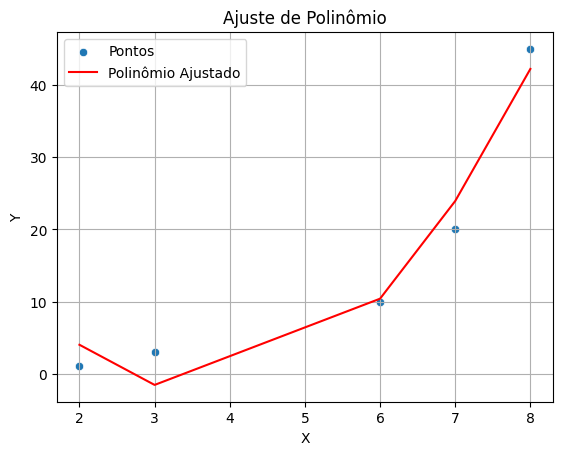

In [ ]:
# Exemplo de uso
dados = pd.read_csv("../csv/quebrar_senha.csv")

x_values = dados["x"].tolist() 
y_values = dados["y"].tolist()
degree = 2  # Grau do polinômio desejado

# Calculando os coeficientes do polinômio e outras métricas
coefficients, y_predicted, SQT, SQE, r_squared = least_squares_fit_polynomial(
    x_values, y_values, degree)

# Output dos dados
print("Matriz criada:")
matrix = pd.DataFrame(np.column_stack([np.array(x_values) ** i for i in range(degree + 1)]))
print(np.column_stack([np.array(x_values) ** i for i in range(degree + 1)]))
print(matrix.to_markdown() + "\n")
print("Valores de x:", x_values)
print("Valores de y:", y_values)
print("Somatório de Xi^2:", np.sum(np.array(x_values) ** 2))
print("Somatório de Xi * Yi:", np.sum(np.array(x_values) * np.array(y_values)))
print("SQT:", SQT)
print("SQE:", SQE)
print("Coeficiente angular (a):", coefficients[-2])
print("Coeficiente linear (b):", coefficients[-1])
print_polynomial_equation(coefficients)
print("Coeficiente de determinação (R²):", round(r_squared * 100, 2))

# Plotando o gráfico
sns.scatterplot(x=x_values,y=y_values, label='Pontos')
plt.plot(x_values, y_predicted, color='red', label='Polinômio Ajustado')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Polinômio')
plt.legend()
plt.grid(True)
plt.show()